In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
df = pd.read_csv("attrition.csv")
df.columns#printing all the columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [119]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [120]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [121]:
#Checking unique values in target column
df['Attrition'].nunique()

2

Since we have only two values in target column hence it is a classification problem

In [122]:
#Dropping EmployeeNumber as it has no role in attrition.
df.drop(['EmployeeNumber'], axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,4,...,4,80,0,17,3,2,9,6,0,8


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [124]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values

In [125]:
#Checking statistical analysis
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [126]:
#Converting the type column into int values from string values using ordinal encoder
df['Attrition'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['BusinessTravel'].replace(['Travel_Rarely', 'Travel_Frequently','Non-Travel'],[0, 1,2], inplace=True)
df['Department'].replace(['Research & Development', 'Sales','Human Resources'],[0, 1,2], inplace=True)
df['EducationField'].replace(['Life Sciences', 'Medical','Marketing','Technical Degree','Other','Human Resources'],[0, 1,2,3,4,5], inplace=True)
df['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
df['JobRole'].replace(['Sales Executive', 'Research Scientist','Laboratory Technician','Manufacturing Director','Healthcare Representative','Manager','Sales Representative','Research Director','Human Resources'],[0, 1,2,3,4,5,6,7,8], inplace=True)
df['MaritalStatus'].replace(['Married', 'Single','Divorced'],[0, 1,2], inplace=True)
df['Over18'].replace(['Y'],[0], inplace=True)
df['OverTime'].replace(['No', 'Yes'],[0, 1], inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,0,23,2,1,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,0,613,0,6,1,1,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,0,155,0,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,1,2,3,1,1,2065,...,4,80,0,17,3,2,9,6,0,8


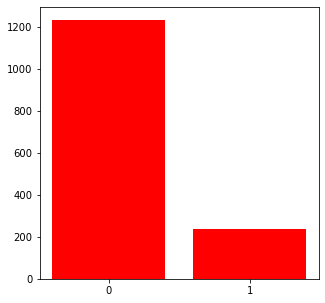

In [127]:
plt.figure(figsize=(5,5))
plt.bar(['0','1'],list(df['Attrition'].value_counts()),color = 'r')
plt.show()

Attrition :Yes is 237 and Attrition : No is 1233

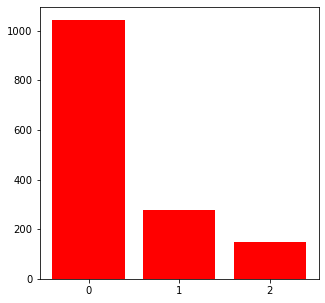

In [128]:
plt.figure(figsize=(5,5))
plt.bar(['0','1','2'],list(df['BusinessTravel'].value_counts()),color = 'r')
plt.show()

BusinessTravel:
    0(Travel_Rarely) is-        1043,
    1(Travel_Frequently) is-    277,
    2(Non) is-                  150

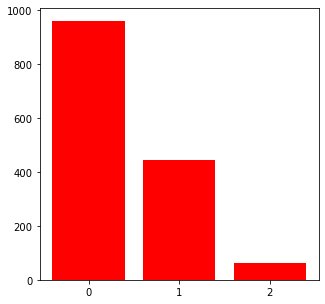

In [129]:
plt.figure(figsize=(5,5))
plt.bar(['0','1','2'],list(df['Department'].value_counts()),color = 'r')
plt.show()

Department:
0(Research & Development) is-    961,
1(Sales) is-                     446,
2(Human Resources) is-           63

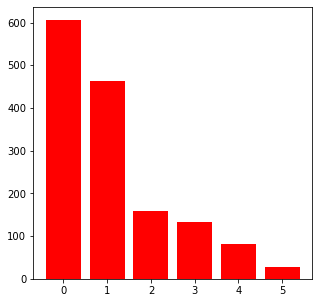

In [130]:
plt.figure(figsize=(5,5))
plt.bar(['0','1','2','3','4','5'],list(df['EducationField'].value_counts()),color = 'r')
plt.show()

EducationField:
0(Life Sciences) is-       606,
1(Medical) is-             464,
2(Marketing) is            159,
3(Technical Degree) is-    132,
4(Other) is-               82,
5(Human Resources) is-     27

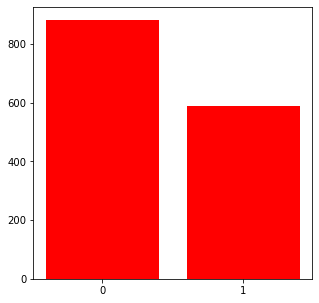

In [131]:
plt.figure(figsize=(5,5))
plt.bar(['0','1'],list(df['Gender'].value_counts()),color = 'r')
plt.show()

Gender:
0(Male) is-      882
1(Female) is-    588

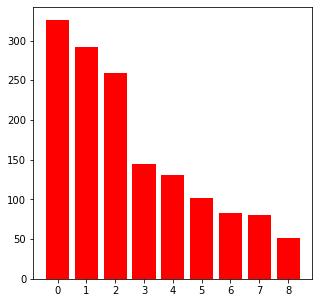

In [132]:
plt.figure(figsize=(5,5))
plt.bar(['0','1','2','3','4','5','6','7','8'],list(df['JobRole'].value_counts()),color = 'r')
plt.show()

JobRole:
0(Sales Executive) is-              326,
1(Research Scientist) is-           292,
2(Laboratory Technician) is-        259,
3(Manufacturing Director) is-       145,
4(Healthcare Representative) is-    131,
5(Manager) is-                      102,
6(Sales Representative) is-          83,
7(Research Director) is-             80,
8(Human Resources) is-               52

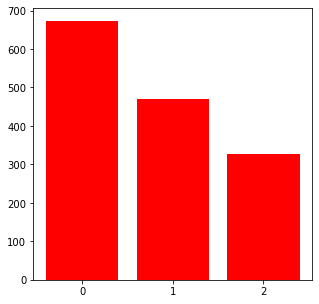

In [133]:
plt.figure(figsize=(5,5))
plt.bar(['0','1','2'],list(df['MaritalStatus'].value_counts()),color = 'r')
plt.show()

MaritalStatus:
0(Married) is-    673
1(Single) is-     470
2(Divorced) is-   327

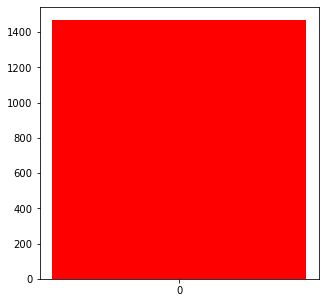

In [134]:
plt.figure(figsize=(5,5))
plt.bar(['0'],list(df['Over18'].value_counts()),color = 'r')
plt.show()

Over18:
    0(Y) is-    1470

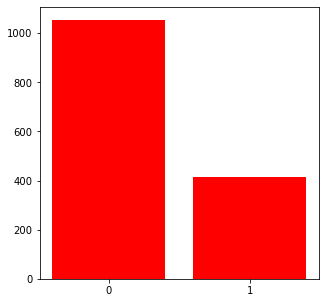

In [135]:
plt.figure(figsize=(5,5))
plt.bar(['0','1'],list(df['OverTime'].value_counts()),color = 'r')
plt.show()

OverTime:
0(No) is-     1054
1(Yes) is-     416

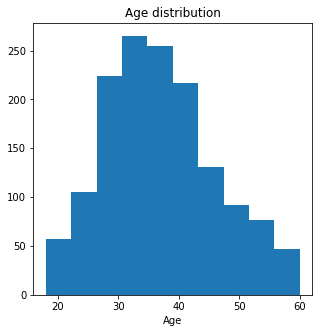

In [136]:
plt.figure(figsize=(5,5))
plt.hist(df['Age'])
plt.title('Age distribution')
plt.xlabel("Age")
plt.show()

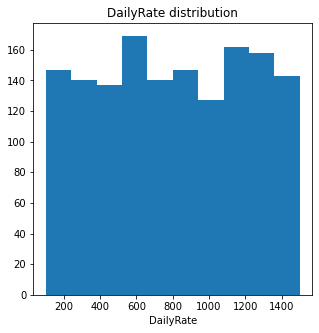

In [137]:
plt.figure(figsize=(5,5))
plt.hist(df['DailyRate'])
plt.title('DailyRate distribution')
plt.xlabel("DailyRate")
plt.show()

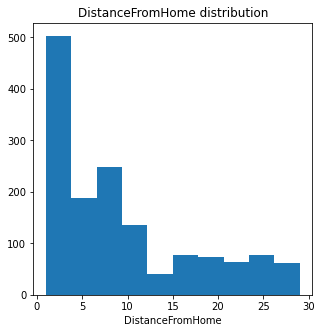

In [138]:
plt.figure(figsize=(5,5))
plt.hist(df['DistanceFromHome'])
plt.title('DistanceFromHome distribution')
plt.xlabel("DistanceFromHome")
plt.show()

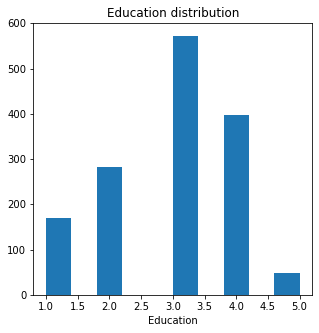

In [139]:
plt.figure(figsize=(5,5))
plt.hist(df['Education'])
plt.title('Education distribution')
plt.xlabel("Education")
plt.show()

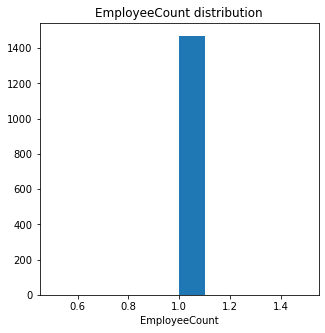

In [140]:
plt.figure(figsize=(5,5))
plt.hist(df['EmployeeCount'])
plt.title('EmployeeCount distribution')
plt.xlabel("EmployeeCount")
plt.show()

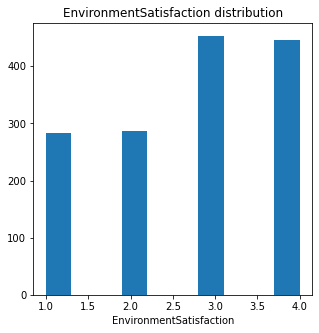

In [141]:
plt.figure(figsize=(5,5))
plt.hist(df['EnvironmentSatisfaction'])
plt.title('EnvironmentSatisfaction distribution')
plt.xlabel("EnvironmentSatisfaction")
plt.show()

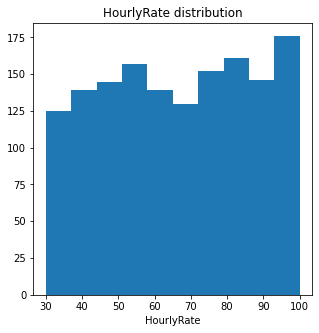

In [142]:
plt.figure(figsize=(5,5))
plt.hist(df['HourlyRate'])
plt.title('HourlyRate distribution')
plt.xlabel("HourlyRate")
plt.show()

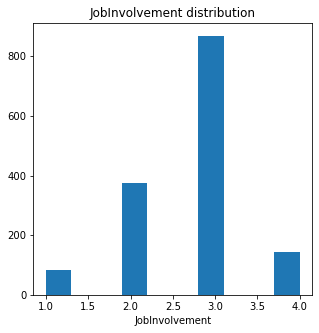

In [143]:
plt.figure(figsize=(5,5))
plt.hist(df['JobInvolvement'])
plt.title('JobInvolvement distribution')
plt.xlabel("JobInvolvement")
plt.show()

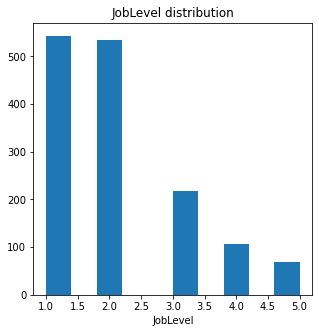

In [144]:
plt.figure(figsize=(5,5))
plt.hist(df['JobLevel'])
plt.title('JobLevel distribution')
plt.xlabel("JobLevel")
plt.show()

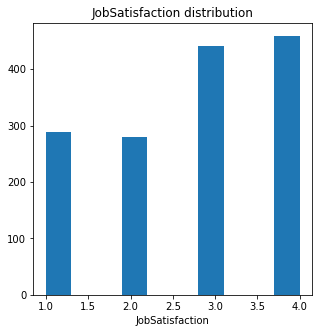

In [145]:
plt.figure(figsize=(5,5))
plt.hist(df['JobSatisfaction'])
plt.title('JobSatisfaction distribution')
plt.xlabel("JobSatisfaction")
plt.show()

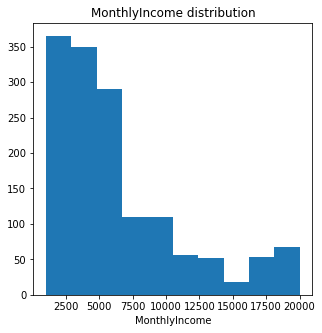

In [146]:
plt.figure(figsize=(5,5))
plt.hist(df['MonthlyIncome'])
plt.title('MonthlyIncome distribution')
plt.xlabel("MonthlyIncome")
plt.show()

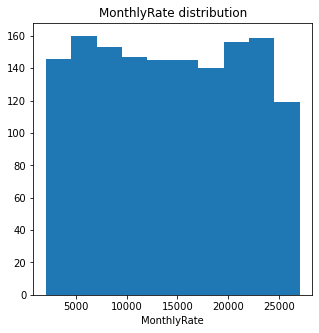

In [147]:
plt.figure(figsize=(5,5))
plt.hist(df['MonthlyRate'])
plt.title('MonthlyRate distribution')
plt.xlabel("MonthlyRate")
plt.show()

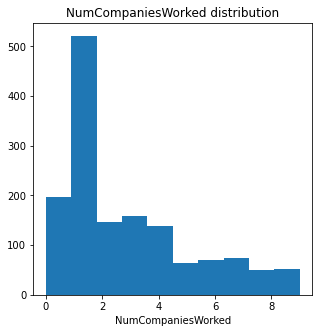

In [148]:
plt.figure(figsize=(5,5))
plt.hist(df['NumCompaniesWorked'])
plt.title('NumCompaniesWorked distribution')
plt.xlabel("NumCompaniesWorked")
plt.show()

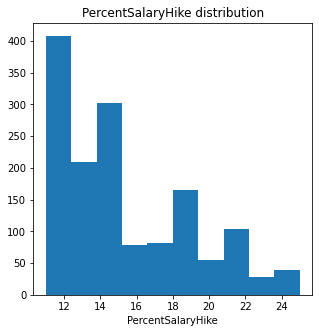

In [149]:
plt.figure(figsize=(5,5))
plt.hist(df['PercentSalaryHike'])
plt.title('PercentSalaryHike distribution')
plt.xlabel("PercentSalaryHike")
plt.show()

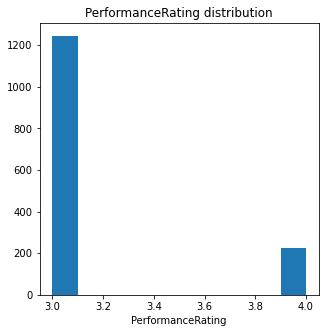

In [150]:
plt.figure(figsize=(5,5))
plt.hist(df['PerformanceRating'])
plt.title('PerformanceRating distribution')
plt.xlabel("PerformanceRating")
plt.show()

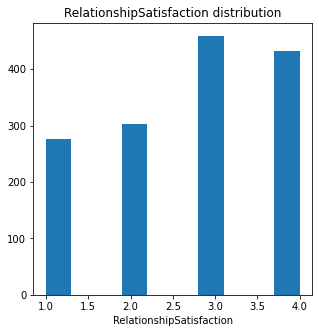

In [151]:
plt.figure(figsize=(5,5))
plt.hist(df['RelationshipSatisfaction'])
plt.title('RelationshipSatisfaction distribution')
plt.xlabel("RelationshipSatisfaction")
plt.show()

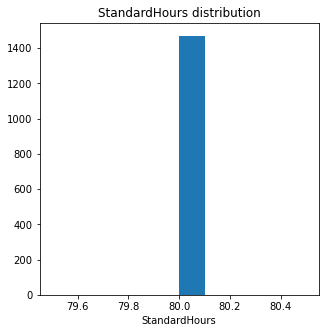

In [152]:
plt.figure(figsize=(5,5))
plt.hist(df['StandardHours'])
plt.title('StandardHours distribution')
plt.xlabel("StandardHours")
plt.show()

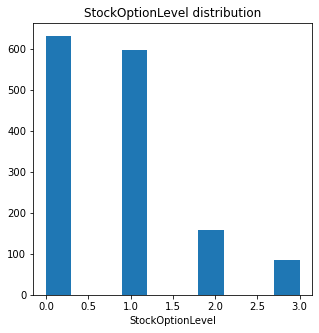

In [153]:
plt.figure(figsize=(5,5))
plt.hist(df['StockOptionLevel'])
plt.title('StockOptionLevel distribution')
plt.xlabel("StockOptionLevel")
plt.show()

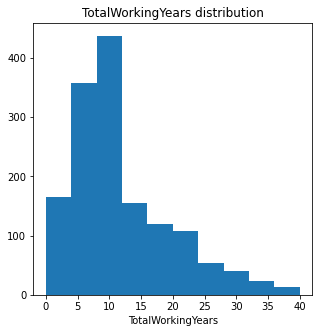

In [154]:
plt.figure(figsize=(5,5))
plt.hist(df['TotalWorkingYears'])
plt.title('TotalWorkingYears distribution')
plt.xlabel("TotalWorkingYears")
plt.show()

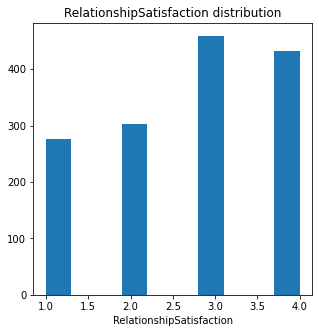

In [155]:
plt.figure(figsize=(5,5))
plt.hist(df['RelationshipSatisfaction'])
plt.title('RelationshipSatisfaction distribution')
plt.xlabel("RelationshipSatisfaction")
plt.show()

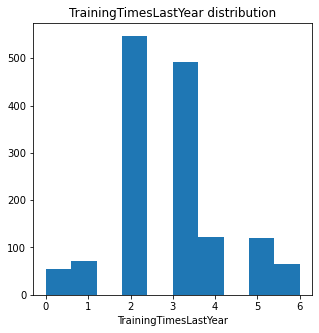

In [156]:
plt.figure(figsize=(5,5))
plt.hist(df['TrainingTimesLastYear'])
plt.title('TrainingTimesLastYear distribution')
plt.xlabel("TrainingTimesLastYear")
plt.show()

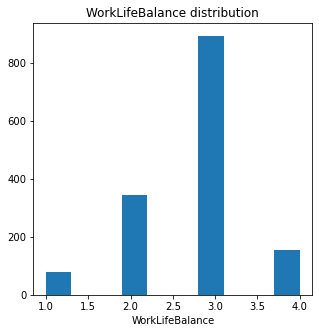

In [157]:
plt.figure(figsize=(5,5))
plt.hist(df['WorkLifeBalance'])
plt.title('WorkLifeBalance distribution')
plt.xlabel("WorkLifeBalance")
plt.show()

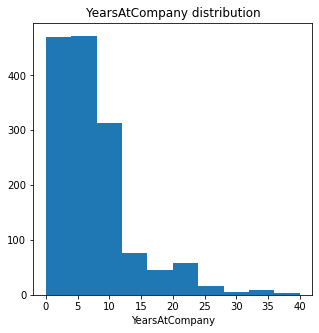

In [158]:
plt.figure(figsize=(5,5))
plt.hist(df['YearsAtCompany'])
plt.title('YearsAtCompany distribution')
plt.xlabel("YearsAtCompany")
plt.show()

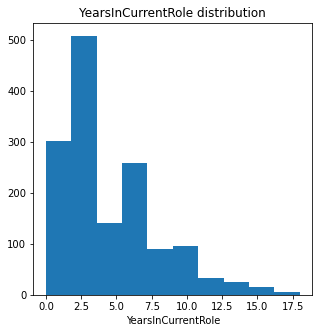

In [159]:
plt.figure(figsize=(5,5))
plt.hist(df['YearsInCurrentRole'])
plt.title('YearsInCurrentRole distribution')
plt.xlabel("YearsInCurrentRole")
plt.show()

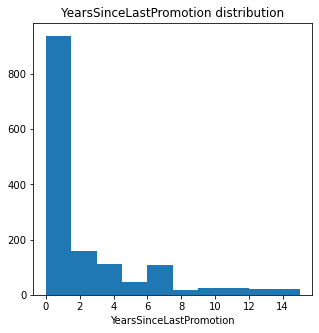

In [160]:
plt.figure(figsize=(5,5))
plt.hist(df['YearsSinceLastPromotion'])
plt.title('YearsSinceLastPromotion distribution')
plt.xlabel("YearsSinceLastPromotion")
plt.show()

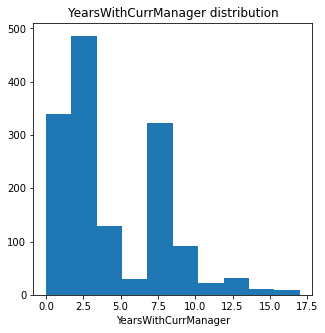

In [161]:
plt.figure(figsize=(5,5))
plt.hist(df['YearsWithCurrManager'])
plt.title('YearsWithCurrManager distribution')
plt.xlabel("YearsWithCurrManager")
plt.show()

In [162]:
#Checking correlation
df.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
Gender                     -0.029453
JobRole                    -0.027930
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel             -0.000074
PerformanceRating           0.002889
MaritalStatus               0.011195
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
E

<AxesSubplot:>

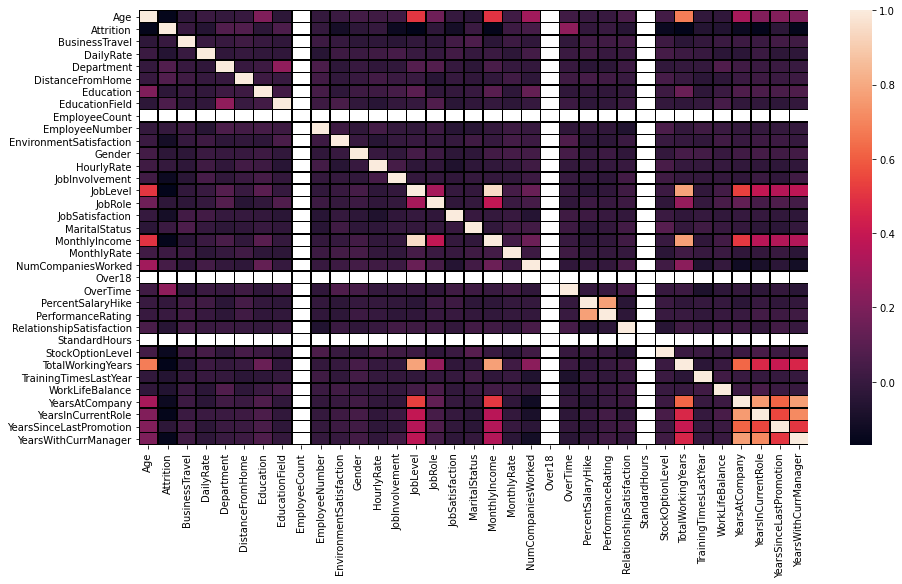

In [163]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), linewidths =0.5, linecolor ="black", fmt = ".2f")

In [164]:
#Checking skewness
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel              1.439006
DailyRate                  -0.003519
Department                  1.141828
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              1.174710
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                      0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                     0.770149
JobSatisfaction            -0.329672
MaritalStatus               0.443615
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [165]:
#Removing skewness using log method because it may lead to multicolinearity
df['DistanceFromHome']= np.log(df['DistanceFromHome'])
df['OverTime']= np.log(df['OverTime'])
df['PercentSalaryHike']= np.log(df['PercentSalaryHike'])
df['PerformanceRating']= np.log(df['PerformanceRating'])
df['TotalWorkingYears']= np.log(df['TotalWorkingYears'])
df['YearsAtCompany']= np.log(df['YearsAtCompany'])
df['YearsInCurrentRole']= np.log(df['YearsInCurrentRole'])
df['YearsSinceLastPromotion']= np.log(df['YearsSinceLastPromotion'])
df['YearsWithCurrManager']= np.log(df['YearsWithCurrManager'])
df['EducationField']= np.log(df['EducationField'])
df['JobRole']= np.log(df['JobRole'])
df['StockOptionLevel']= np.log(df['StockOptionLevel'])

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Age                            AxesSubplot(0.125,0.657941;0.0503247x0.222059)
Attrition                    AxesSubplot(0.18539,0.657941;0.0503247x0.222059)
BusinessTravel              AxesSubplot(0.245779,0.657941;0.0503247x0.222059)
DailyRate                   AxesSubplot(0.306169,0.657941;0.0503247x0.222059)
Department                  AxesSubplot(0.366558,0.657941;0.0503247x0.222059)
DistanceFromHome            AxesSubplot(0.426948,0.657941;0.0503247x0.222059)
Education                   AxesSubplot(0.487338,0.657941;0.0503247x0.222059)
EducationField              AxesSubplot(0.547727,0.657941;0.0503247x0.222059)
EmployeeCount               AxesSubplot(0.608117,0.657941;0.0503247x0.222059)
EmployeeNumber              AxesSubplot(0.668506,0.657941;0.0503247x0.222059)
EnvironmentSatisfaction     AxesSubplot(0.728896,0.657941;0.0503247x0.222059)
Gender                      AxesSubplot(0.789286,0.657941;0.0503247x0.222059)
HourlyRate                  AxesSubplot(0.849675,0.657941;0.0503

<Figure size 5760x5760 with 0 Axes>

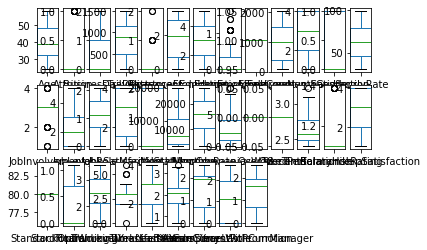

In [166]:
#Plotting boxplot to check outliers
plt.figure(figsize=(80,80))
df=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
#checking outliers
df.plot(kind='box',widths=1,subplots=True,layout=(3,13))

In [167]:
df.shape

(51, 35)

In [168]:
df = df[(z<3).all(axis=1)]
df.shape

ValueError: Item wrong length 1470 instead of 51.

In [ ]:
from scipy.stats import zscore
z= np.abs(zscore(df))
np.where(z>3)

No Outliers

In [ ]:
#dividing data into x (input) and y (target) variables
x=df.drop(['Attrition'], axis=1)# independent variables
y=df['Attrition']#target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Model Selection

In [169]:
# Logistic Classifier

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


83.13

In [176]:
# KNeighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

88.31

In [177]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

77.64

In [178]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [180]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [181]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.03

In [182]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,acc_random_forest, acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
5,Decision Tree,100.00
1,KNN,88.31
2,Logistic Regression,83.13
0,Support Vector Machines,83.03
4,Naive Bayes,77.64


In [184]:
#Saving the model
import pickle
file_name = "churn.pkl"
pickle.dump(random_forest,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(X_test,y_test)
print(result*100)
conclusion =pd.DataFrame([loaded_model.predict(X_test)[:],Y_pred[:]],index = ["Predicted","Original"])
conclusion

87.65432098765432


,0,1,2,3,4,5,6,7,8,9,...,476,477,478,479,480,481,482,483,484,485
Predicted,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
